In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import imageio

# Hyperparameter experiments

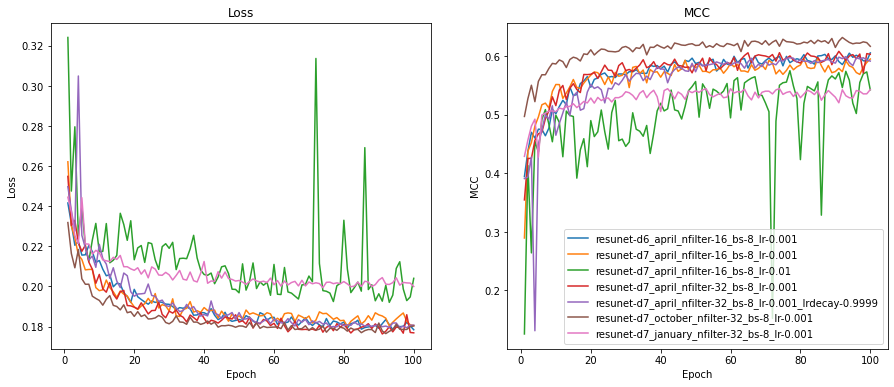

In [12]:
results_dir = '../experiments/france/'
'resunet-d6_april_nfilter-16_bs-8_lr-0.001/'
models = ['resunet-d6', 'resunet-d7']
months = ['april', 'october', 'january']
nfilters = [16, 32]
batch_sizes = [8]
learning_rates = [0.001, 0.01]
lr_decays = [None, 0.9999]
legend = []

fig, ax = plt.subplots(1,2, figsize=(15,6))

for model in models:
    for month in months:
        for nfilter in nfilters:
            for batch_size in batch_sizes:
                for learning_rate in learning_rates:
                    for lr_decay in lr_decays:
                        
                        experiment_name = '{}_{}_nfilter-{}_bs-{}_lr-{}'.format(
                            model, month, nfilter, batch_size, learning_rate)
                        if lr_decay:
                            experiment_name = experiment_name + '_lrdecay-{}'.format(lr_decay)
                            
                        if os.path.exists(os.path.join(results_dir, experiment_name)):
                            
                            metrics = pd.read_csv(os.path.join(results_dir, experiment_name, 'metrics.csv'))
                            legend.append(experiment_name)
                            ax[0].plot(np.arange(1, metrics.shape[0]+1), metrics['val_loss'].values)
                            ax[1].plot(np.arange(1, metrics.shape[0]+1), metrics['val_mcc'].values)

ax[0].set_title('Loss')
ax[0].set_ylabel('Loss')

ax[1].set_title('MCC')
ax[1].set_ylabel('MCC')

for i in range(2):
    ax[i].set_xlabel('Epoch')
plt.legend(legend)
plt.show()

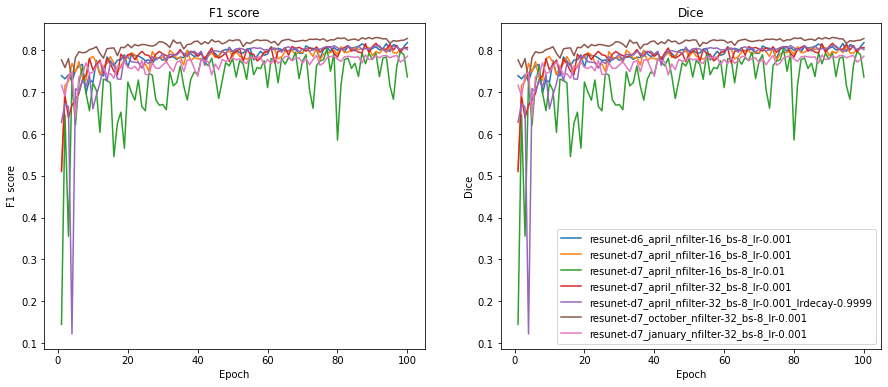

In [3]:
results_dir = '../experiments/france/'
'resunet-d6_april_nfilter-16_bs-8_lr-0.001/'
models = ['resunet-d6', 'resunet-d7']
months = ['april', 'october', 'january']
nfilters = [16, 32]
batch_sizes = [8]
learning_rates = [0.001, 0.01]
lr_decays = [None, 0.9999]
legend = []

fig, ax = plt.subplots(1,2, figsize=(15,6))

for model in models:
    for month in months:
        for nfilter in nfilters:
            for batch_size in batch_sizes:
                for learning_rate in learning_rates:
                    for lr_decay in lr_decays:
                        
                        experiment_name = '{}_{}_nfilter-{}_bs-{}_lr-{}'.format(
                            model, month, nfilter, batch_size, learning_rate)
                        if lr_decay:
                            experiment_name = experiment_name + '_lrdecay-{}'.format(lr_decay)
                            
                        if os.path.exists(os.path.join(results_dir, experiment_name)):
                            
                            metrics = pd.read_csv(os.path.join(results_dir, experiment_name, 'metrics.csv'))
                            legend.append(experiment_name)
                            ax[0].plot(np.arange(1, metrics.shape[0]+1), metrics['val_f1'].values)
                            ax[1].plot(np.arange(1, metrics.shape[0]+1), metrics['val_dice'].values)

ax[0].set_title('F1 score')
ax[0].set_ylabel('F1 score')

ax[1].set_title('Dice')
ax[1].set_ylabel('Dice')

for i in range(2):
    ax[i].set_xlabel('Epoch')
plt.legend(legend)
plt.show()

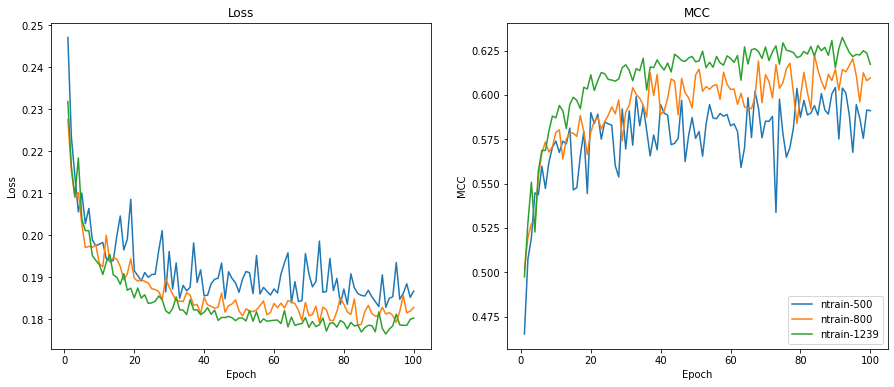

In [18]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
ntrain_sizes = ['ntrain-500_', 'ntrain-800_', '']
results_dir = '../experiments/france/'
legend = []
best_vals = []

for size in ntrain_sizes:

    experiment_name = 'resunet-d7_october_{}nfilter-32_bs-8_lr-0.001/'.format(size)
    metrics = pd.read_csv(os.path.join(results_dir, experiment_name, 'metrics.csv'))
    legend.append(size[:-1])
    ax[0].plot(np.arange(1, metrics.shape[0]+1), metrics['val_loss'].values)
    ax[1].plot(np.arange(1, metrics.shape[0]+1), metrics['val_mcc'].values)
    
    best_vals.append(np.mean(metrics['val_mcc'].values[80:]))

ax[0].set_title('Loss')
ax[0].set_ylabel('Loss')

ax[1].set_title('MCC')
ax[1].set_ylabel('MCC')

for i in range(2):
    ax[i].set_xlabel('Epoch')
    
legend[-1] = 'ntrain-1239'
plt.legend(legend)
plt.show()

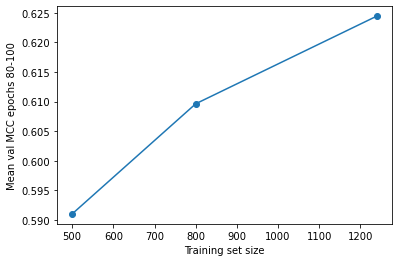

In [19]:
plt.plot([500,800,1239], best_vals, 'o-')
plt.xlabel('Training set size')
plt.ylabel('Mean val MCC epochs 80-100')
plt.show()

# Multiple months as input

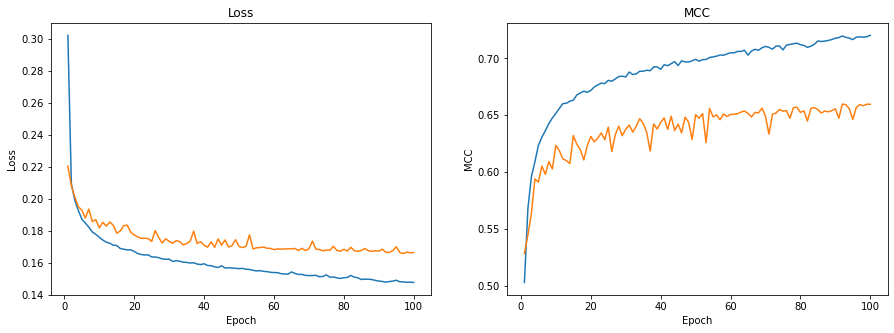

In [7]:
results_dir = '../experiments/france/resunet-d6_janAprOct_nfilter-16_bs-8_lr-0.001/'

fig, ax = plt.subplots(1,2, figsize=(15,5))
                            
metrics = pd.read_csv(os.path.join(results_dir, 'metrics.csv'))
ax[0].plot(np.arange(1, metrics.shape[0]+1), metrics['train_loss'].values)
ax[0].plot(np.arange(1, metrics.shape[0]+1), metrics['val_loss'].values)

ax[1].plot(np.arange(1, metrics.shape[0]+1), metrics['train_mcc'].values)
ax[1].plot(np.arange(1, metrics.shape[0]+1), metrics['val_mcc'].values)

ax[0].set_title('Loss')
ax[0].set_ylabel('Loss')

ax[1].set_title('MCC')
ax[1].set_ylabel('MCC')

for i in range(2):
    ax[i].set_xlabel('Epoch')

plt.show()

In [6]:
metrics['val_mcc'].values[80:].mean()

0.6548487339408847